In [ ]:
pip install geodatasets

In [ ]:
import os
import requests
import pandas as pd
import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup


Fetching data for 250401...
Fetching data for 250402...
Fetching data for 250403...
Fetching data for 250404...
Fetching data for 250405...
Fetching data for 250406...
Fetching data for 250407...
Fetching data for 250408...
Fetching data for 250409...
Fetching data for 250410...
Fetching data for 250411...
Fetching data for 250412...
Fetching data for 250413...
Fetching data for 250414...
Fetching data for 250415...
Fetching data for 250416...
Fetching data for 250417...
Fetching data for 250418...
Fetching data for 250419...
Fetching data for 250420...
Fetching data for 250421...
Fetching data for 250422...
Fetching data for 250423...
Fetching data for 250424...
Fetching data for 250425...
Fetching data for 250426...
Fetching data for 250427...
Fetching data for 250428...
Fetching data for 250429...
Fetching data for 250430...
Fetching data for 250501...
Fetching data for 250502...
Fetching data for 250503...
Fetching data for 250504...
Fetching data for 250505...
Fetching data for 25

/tmp/ipykernel_3799430/717772528.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat(all_data, ignore_index=True)


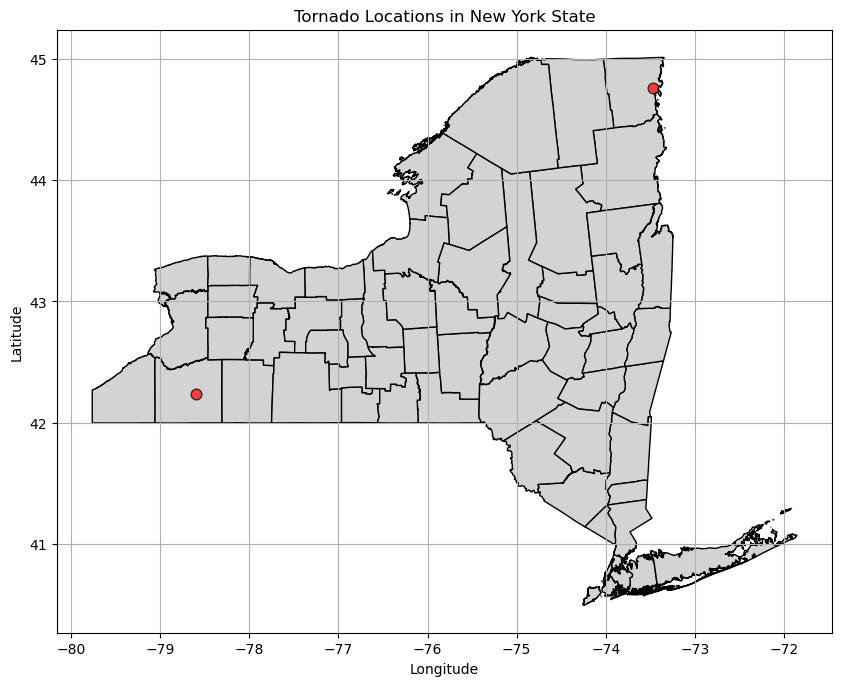

In [2]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime
import requests
from io import StringIO


# Set the path to PROJ library (if needed for GeoPandas)
os.environ['PROJ_LIB'] = '/usr/share/proj'  # Update this path if needed

# Load New York State shapefile (adjust path as necessary)
ny_counties_map = gpd.read_file("/nfs/home11/ugrad/2024/es348865/Current_Code_projects/swrcc_code/shapefiles_code/state/NYS_Counties.shp")
ny_counties_map = ny_counties_map.to_crs(epsg=4326)  # WGS84

def fetch_tornado_csv(date_str):
    """Fetch tornado CSV data for a specific date from SPC."""
    url = f"https://www.spc.noaa.gov/climo/reports/{date_str}_rpts_torn.csv"
    response = requests.get(url)
    if response.status_code == 200:
        return response.content.decode('utf-8')
    else:
        print(f"Data not found for {date_str}")
        return None

def parse_tornado_csv(csv_content):
    """Parse tornado CSV content and filter for NY state."""
    df = pd.read_csv(StringIO(csv_content))
    df = df[df['State'] == 'NY']
    df = df[['County', 'Lat', 'Lon']]
    df = df.dropna()
    return df

def collect_tornado_data(start_date, end_date, output_file):
    """Collect tornado reports from SPC over a date range."""
    all_data = []

    current_date = start_date
    while current_date <= end_date:
        date_str = current_date.strftime('%y%m%d')
        print(f"Fetching data for {date_str}...")
        csv_content = fetch_tornado_csv(date_str)
        if csv_content:
            day_df = parse_tornado_csv(csv_content)
            all_data.append(day_df)
        current_date += datetime.timedelta(days=1)

    if all_data:
        result_df = pd.concat(all_data, ignore_index=True)
        result_df.to_csv(output_file, index=False)
        print(f"Tornado event data saved to '{output_file}'")
    else:
        print("No tornado data found for given range.")

def plot_tornado_locations(tornado_data_file):
    """Plot tornado locations on a NY map."""
    df = pd.read_csv(tornado_data_file)

    fig, ax = plt.subplots(figsize=(10, 10))
    ny_counties_map.plot(ax=ax, color='lightgrey', edgecolor='black')
    ax.scatter(df['Lon'], df['Lat'], c='red', s=60, edgecolor='k', alpha=0.7)
    ax.set_title("Tornado Locations in New York State")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.grid(True)
    plt.show()

# Example usage
start_date = datetime.datetime(2025, 4, 1)
end_date = datetime.datetime.now()
output_file = "tornado_events_ny.csv"

collect_tornado_data(start_date, end_date, output_file)
plot_tornado_locations(output_file)
